In [1]:
from datetime import datetime
import pandas as pd 
import pickle
import numpy as np 
import itertools
import statsmodels.api as stats


base = ['AAPL','AMZN','NFLX','GOOGL','TSLA','META']
study=['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT']
allSecurities=base+study
comparisonDataTime =datetime.strptime('2024-03-04', "%Y-%m-%d")

In [2]:
cryptoFile='../data/DailyCryptoData2025_13_03.pkl'
magFile='../data/N_DailyMagnificient2025_13_03.pkl'
crypData={}
loader=lambda file :pickle.load(open(file,'rb'))
ret =lambda px:px/px.shift()-1
crypData=loader(cryptoFile)
magData=loader(magFile)
crypRetALL=ret(crypData).fillna(0)
magRet=ret(magData).fillna(0)
comparison={}






In [3]:
crypRetALL.loc['2023-03-16']

BTCUSDT      0.029845
ETHUSDT      0.014069
ADAUSDT      0.001235
BNBUSDT      0.074086
XRPUSDT      0.000000
DOTUSDT      0.037800
MATICUSDT    0.033483
Name: 2023-03-16 00:00:00, dtype: float64

In [4]:
crypttoTestFile="../data/DailyCryptoDataTest.pkl"
magTestFile="../data/DailyMagnificient_Test_All2025_13_23.pkl"
cryptTestData=loader(crypttoTestFile)
magTestData=loader(magTestFile)
testCrypReturns=ret(cryptTestData).fillna(0)
testMgRet=ret(magTestData).fillna(0)
testReturns=pd.DataFrame()
testReturns=pd.concat([testMgRet['Close'],testCrypReturns],axis=0)
testReturns=testReturns[allSecurities]


In [5]:
sharp =lambda ret:ret.mean()/ret.std()*np.sqrt(252)

In [6]:
def getAlphaBeta(pred,compare):
    X = stats.add_constant(compare)
    common_index=X.index.intersection(pred.index)
    X =X[X.index.isin(common_index)]
    
    pred =pred[pred.index.isin(common_index)]
    
    mod=stats.OLS(pred,X)
    res=mod.fit()
    return res

In [7]:
for cryp in study:
    for compare in base:
  
        comparison[compare]=getAlphaBeta(crypRetALL[cryp],magRet[compare])
        beta=comparison[compare].params[compare]
        print(cryp+":"+compare+":"+str(beta))
    

BTCUSDT:AAPL:0.5450450659889443
BTCUSDT:AMZN:0.49121843011021665
BTCUSDT:NFLX:0.34727358886807863
BTCUSDT:GOOGL:0.5609038527770227
BTCUSDT:TSLA:0.2451359351293328
BTCUSDT:META:0.3233270332623297
ETHUSDT:AAPL:0.7191652241827389
ETHUSDT:AMZN:0.6104318657868126
ETHUSDT:NFLX:0.41190361858585245
ETHUSDT:GOOGL:0.744103679476121
ETHUSDT:TSLA:0.2840213314872726
ETHUSDT:META:0.423433952575257
ADAUSDT:AAPL:0.7664756876199574
ADAUSDT:AMZN:0.6836663762162685
ADAUSDT:NFLX:0.46045069664370664
ADAUSDT:GOOGL:0.7896923202961899
ADAUSDT:TSLA:0.30916597209393754
ADAUSDT:META:0.46611970034593786
BNBUSDT:AAPL:0.6489505967920137
BNBUSDT:AMZN:0.5265451719388192
BNBUSDT:NFLX:0.3823297668087403
BNBUSDT:GOOGL:0.5852848176451022
BNBUSDT:TSLA:0.25086266243885214
BNBUSDT:META:0.3584154020511151
XRPUSDT:AAPL:0.271907567632893
XRPUSDT:AMZN:0.15728253453891974
XRPUSDT:NFLX:0.15318605094331214
XRPUSDT:GOOGL:0.24548688586211306
XRPUSDT:TSLA:0.12328761562581984
XRPUSDT:META:0.13753114859369805
DOTUSDT:AAPL:0.39160055984

In [8]:
#crypRetALL.corr(magRet[compare])

AAPL-0.5450450659889441
AMZN-0.49121843011021693
NFLX-0.3472735888680784
GOOGL-0.5609038527770219
QQQ-0.9215293678551346
TSLA-0.24513593512933282
NDX-0.9721787609514849
META-0.3233270332623299
TSLA is low --comparing momentum and reversal with it to calculate arbitrage 

In [9]:
# funtion to calc momentum
def momentum(ret,horizon,base_period=50):
    port = np.sqrt(horizon)*(ret.rolling(horizon,min_periods=1).mean()) 
    port = port / ret.rolling(base_period,min_periods=horizon).std()
    port = np.tanh(port)
    return port.shift()

In [10]:
def drawDownDurationDays(px):
    px=(1+px.sort_index()).cumprod()*100
    peak = px.expanding(min_periods=1).max()
    res = pd.DataFrame(0,index=px.index,columns=["DrawdownDuration"])
    

    for dt in range(len(px)):
        if px.iloc[dt] >= peak.iloc[dt]:
            res.iloc[dt] = 0
    
        else:    
            if(len(res.iloc[:dt])>2):
                res.iloc[dt] = res.iloc[:dt].iloc[-2] + 1
                #print(f' date{dt}: days { res.iloc[dt]}')

    return res

In [11]:
def drawdown(px):
    px=(1+px.sort_index()).cumprod()*100
    return (px / px.expanding(min_periods=1).max() - 1)

In [12]:
crypRet=pd.DataFrame()

crypRet=pd.concat([magRet,crypRetALL],axis=1)
crypRet=crypRet[allSecurities]

In [13]:
crypRet.loc['2023-03-16']

AAPL       0.018694
AMZN       0.039917
NFLX       0.020639
GOOGL      0.043804
TSLA       0.020394
META       0.036308
BTCUSDT    0.029845
ETHUSDT    0.014069
ADAUSDT    0.001235
BNBUSDT    0.074086
XRPUSDT    0.000000
DOTUSDT    0.037800
Name: 2023-03-16 00:00:00, dtype: float64

In [14]:
crypRet=crypRet.fillna(method='ffill')
crypRet=crypRet.fillna(method='bfill')

C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\73772504.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypRet=crypRet.fillna(method='ffill')
C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\73772504.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypRet=crypRet.fillna(method='bfill')


In [15]:
def calBeta(Y,ticker):
   
    X=crypRet[ticker]
    X =X[X.index<=Y.index[-1]]
    X=X[-252:]
    X = stats.add_constant(X)
    mod=stats.OLS(Y,X)
    res=mod.fit()
    results = res.params[ticker]
    return results

In [16]:
#beta={}
#for ticker in base:
    #beta[ticker]=crypRet.rolling(252,min_periods=1).apply(lambda y:calBeta(y,ticker))
    #beta_QQQ=crypRet.rolling(252,min_periods=1).apply(lambda y:calBeta(y,'QQQ'))                                                 
                                         

In [17]:
# returns annualized returns 
def findRollingParams(ret,baseDays=30):
    data={}
  
    spratio = lambda ret:ret.mean()/ret.std()*np.sqrt(baseDays)
    volLambda= lambda x:x.var()*baseDays
    #sharp=ret.groupby(ret.index.year).apply(spratio)
    vol=ret.rolling(baseDays,min_periods=1).apply(volLambda)
    corr= ret.rolling(baseDays,min_periods=1).corr()
    cov= ret.rolling(baseDays,min_periods=1).cov()
    data["ret"]=ret
    data["volatility"]=vol
    data["cor"]=corr
    data["cov"]=cov

    #sigma=sigma[mask]
    #print(sigma.index.get_level_values(0))
    #sigma=pd.DataFrame(sigma)
    #sigma.index=sigma.index.get_level_values(0)
 

    return data

In [18]:
def getOptimalWts(matrix,mu):
    final_wt=[]
    if isinstance(matrix,pd.DataFrame) and matrix.shape[0]==matrix.shape[1]:
        sigma_inv=np.linalg.inv(np.array(matrix))
        final_wt = sigma_inv@mu
    else:
        final_wt=np.divide(mu,np.where(matrix!=0,matrix,1))
    final_wt=final_wt.div(np.abs(final_wt).sum(axis=1).values, axis=0)
    if isinstance(final_wt,np.ndarray):
        final_wt=pd.DataFrame(final_wt)
    return final_wt.shift()


In [19]:
def getOptimalWtsinTimePeriod(matrix,mu,filter):
    final_wt=[]
    matrix=matrix[[filter]]
    mu=[[filter]]
    if isinstance(matrix,pd.DataFrame) and matrix.shape[0]==matrix.shape[1]:
        sigma_inv=np.linalg.inv(np.array(matrix))
        final_wt = sigma_inv@mu
    else:
        final_wt=np.divide(mu,np.where(matrix!=0,matrix,1))
    final_wt=final_wt.div(np.abs(final_wt).sum(axis=1).values, axis=0)
    print(type(final_wt))
    if isinstance(final_wt,np.ndarray):
        final_wt=pd.DataFrame(final_wt)
    return final_wt.shift()


In [20]:
#finalSet=['BTCUSDT','ETHUSDT','DOTUSDT','TSLA']
#finalSet=['BTCUSDT','TSLA']

In [21]:
def createVolatilityMatrix(vol,order):
    return vol[order].fillna(0)

In [22]:
def createVolatilityCovMatrix(vol,cov,order):
    df1=vol[order].fillna(0)
    df2=cov[order].fillna(0)
 
   
    
    # Create Cartesian Product for each date and column
    def cartesian_product(df1_row, df2_row):
        print(df2_row.keys())
        return [
                {col: val1 if val1 == val2 else val2 for col, (val1, val2) in zip(df1_row.keys(), zip(df1_row.values, df2_row.values))}
                for df1_row, df2_row in itertools.product([df1_row], [df2_row])]
    
    result = []
    for date in df2.index:
        df1_row = df1.loc[date]
        df2_row = df2.loc[date]
        print(df1_row)
        result.append(cartesian_product(df1_row, df2_row))
    
    # Convert the Cartesian product into a DataFrame
    matrix = pd.DataFrame(result, index=df2.index)

    
    return matrix
                
    

In [23]:
params=findRollingParams(crypRet)
paramsTest=findRollingParams(testReturns)

In [24]:
params["volatility"]

,AAPL,AMZN,NFLX,GOOGL,TSLA,META,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015843,0.009589,0.007337,0.036211,0.011698,0.000000
2020-01-03,0.000945,0.001474,0.001405,0.000274,0.008781,0.000280,0.058881,0.047752,0.029775,0.068072,0.024949,0.000000
2020-01-04,0.000945,0.001474,0.001405,0.000274,0.008781,0.000280,0.039624,0.032400,0.020052,0.046764,0.016693,0.000000
2020-01-05,0.000851,0.001326,0.001265,0.000246,0.007903,0.000252,0.029804,0.024324,0.015101,0.036456,0.013084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25,0.007693,0.008400,0.005249,0.014976,0.026223,0.005184,0.006935,0.023466,0.037835,0.028603,0.036625,0.052689
2025-02-26,0.008509,0.008513,0.004370,0.015087,0.026908,0.005335,0.006935,0.022040,0.037676,0.028536,0.036564,0.052964
2025-02-27,0.008670,0.008937,0.005083,0.015171,0.027190,0.005842,0.006837,0.022032,0.037752,0.028424,0.036658,0.053208
2025-02-28,0.008996,0.009459,0.005362,0.015146,0.030032,0.005779,0.006845,0.021903,0.037403,0.028383,0.036765,0.053129


In [25]:
params["cov"]

AAPL      AMZN      NFLX     GOOGL      TSLA  \
2020-01-01 AAPL          NaN       NaN       NaN       NaN       NaN   
           AMZN          NaN       NaN       NaN       NaN       NaN   
           NFLX          NaN       NaN       NaN       NaN       NaN   
           GOOGL         NaN       NaN       NaN       NaN       NaN   
           TSLA          NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
2025-03-03 ETHUSDT -0.000051 -0.000167  0.000044 -0.000140 -0.000049   
           ADAUSDT  0.000065 -0.000092 -0.000042 -0.000072 -0.000271   
           BNBUSDT -0.000061 -0.000259 -0.000074 -0.000263 -0.000284   
           XRPUSDT -0.000015 -0.000184 -0.000040 -0.000088 -0.000111   
           DOTUSDT -0.000154 -0.000322  0.000033 -0.000185 -0.000160   

                            META   BTCUSDT   ETHUSDT   ADAUSDT   BNBUSDT  \
2020-01-01 AAPL              NaN       NaN       NaN       NaN       NaN   
           AMZN              NaN       NaN       NaN       NaN       NaN   
           NFLX              NaN       NaN       NaN       NaN       NaN   
           GOOGL             NaN       NaN       NaN       NaN       NaN   
           TSLA              NaN       NaN       NaN       NaN       NaN   
...                          ...       ...       ...       ...       ...   
2025-03-03 ETHUSDT  2.038010e-05  0.000257  0.000722  0.000541  0.000523   
           ADAUSDT  4.143107e-05  0.000233  0.000541  0.001245  0.000616   
           BNBUSDT -3.325510e-05  0.000236  0.000523  0.000616  0.000915   
           XRPUSDT -2.098898e-07  0.000376  0.000540  0.000705  0.000485   
           DOTUSDT  7.054262e-05  0.000371  0.001012  0.001074  0.000904   

                     XRPUSDT   DOTUSDT  
2020-01-01 AAPL          NaN       NaN  
           AMZN          NaN       NaN  
           NFLX          NaN       NaN  
           GOOGL         NaN       NaN  
           TSLA          NaN       NaN  
...                      ...       ...  
2025-03-03 ETHUSDT  0.000540  0.001012  
           ADAUSDT  0.000705  0.001074  
           BNBUSDT  0.000485  0.000904  
           XRPUSDT  0.001209  0.000878  
           DOTUSDT  0.000878  0.001777  

[22596 rows x 12 columns]

In [26]:
#createVolatilityCovMatrix(params["volatility"],params["cov"],allSecurities)

In [27]:
#check covariance of the securities

#simple_matrix=createVolatilityCovMatrix(params["volatility"],params["cov"],allSecurities)
#simple_matrixTest=createVolatilityCovMatrix(paramsTest["volatility"],paramsTest["cov"],allSecurities)
simple_matrix=createVolatilityMatrix(params["volatility"],allSecurities)
simple_matrixTest=createVolatilityMatrix(paramsTest["volatility"],allSecurities)



In [28]:
portfolitoWts=getOptimalWts(simple_matrix,params['ret'][allSecurities])
portfolitoWtsTest=getOptimalWts(simple_matrixTest,paramsTest['ret'][allSecurities])




In [29]:
(portfolitoWtsTest.tail(2)).abs().sum(1)


2025-04-20    1.0
2025-04-21    1.0
dtype: float64

In [30]:
portfolio=np.sum(crypRet[allSecurities]*portfolitoWts,1)

In [31]:
portfolio

2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03   -0.044280
2020-01-04    0.008449
2020-01-05    0.008738
                ...   
2025-02-25    0.018032
2025-02-26    0.007198
2025-02-27   -0.003448
2025-02-28   -0.013424
2025-03-03    0.004926
Length: 1883, dtype: float64

In [32]:
sharp(portfolio) #this is biased as this data was used to calculate 

np.float64(3.8473282965013222)

In [33]:
portfolioRetTestData=np.sum((testReturns*portfolitoWtsTest),1)

In [34]:
#simplePortfolioSharp
sharp(portfolioRetTestData)

np.float64(-2.980020730746669)

#Momentum based chnage in wts

In [35]:
def getMomentumFor(filtersharp,allSecurities,ret):
    momentumStrategyAllSecurties={}
    testVars=[[5,50],[5,100],[5,150],[5,200],[5,365],[3,365],[10,100],[10,150],[10,200],[10,250],[10,365],[20,200],[20,365],[25,365]]
    for sec in allSecurities:
        momentumStrategyVar=[]
        maxSharp=0
        for index,dataPts in enumerate(testVars) :
            portfolio=ret[sec]
            portMomentum=momentum(portfolio,dataPts[0],dataPts[1])
            strat_ret=portMomentum*portfolio
            newSharp=sharp(strat_ret)
            if(newSharp>maxSharp):
                momentumStrategyVar=dataPts               
                maxSharp=newSharp
        print(f' Sec: {sec} dataPoints :{momentumStrategyVar}  Sharp : {maxSharp}')
        if(maxSharp>filtersharp):
            momentumStrategyAllSecurties[sec]=momentumStrategyVar
    return momentumStrategyAllSecurties
           
# portMomentum this is the weight from momentum srtategy 

In [36]:
momentumStrategyAllSecurties=getMomentumFor(1,allSecurities,crypRet)

 Sec: AAPL dataPoints :[3, 365]  Sharp : 2.323665434013332
 Sec: AMZN dataPoints :[3, 365]  Sharp : 3.065365473604552
 Sec: NFLX dataPoints :[3, 365]  Sharp : 2.301459770276747
 Sec: GOOGL dataPoints :[3, 365]  Sharp : 2.361061550919612
 Sec: TSLA dataPoints :[3, 365]  Sharp : 2.7962080879671
 Sec: META dataPoints :[5, 50]  Sharp : 1.868777783351149
 Sec: BTCUSDT dataPoints :[25, 365]  Sharp : 0.6479462938289737
 Sec: ETHUSDT dataPoints :[10, 200]  Sharp : 0.5501578130094833
 Sec: ADAUSDT dataPoints :[20, 365]  Sharp : 1.0578039042165293
 Sec: BNBUSDT dataPoints :[25, 365]  Sharp : 0.5988108438182846
 Sec: XRPUSDT dataPoints :[5, 50]  Sharp : 1.208138753261018
 Sec: DOTUSDT dataPoints :[25, 365]  Sharp : 0.6865281687573213


In [37]:
#turover_momentum=(portMomentum.fillna(0)-portMomentum.shift().fillna(0)).abs()

In [38]:
def getMomentumForPortfolio(ret,wts,dataPointsForAllSecurities):
    momentumAllSec=pd.DataFrame()
    for sec in dataPointsForAllSecurities.keys():
        momentumStrategyVar=dataPointsForAllSecurities[sec]
        if(momentumStrategyVar is not None and len(momentumStrategyVar)>=2):
            momentumAllSec[sec]=momentum(ret[sec],momentumStrategyVar[0],momentumStrategyVar[1])*wts[sec]
        else:
            momentumAllSec[sec]=wts[sec]
    return momentumAllSec
        
    

In [39]:
portfolitoWts

,AAPL,AMZN,NFLX,GOOGL,TSLA,META,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.179210,-0.230353,-0.263345,-0.118537,-0.208555,0.000000
2020-01-04,-0.139743,-0.111917,-0.114595,-0.259704,0.045846,-0.256756,0.012722,0.015050,0.018268,0.009205,0.016195,0.000000
2020-01-05,-0.148350,-0.118809,-0.121652,-0.275698,0.048669,-0.272568,0.000188,0.000233,0.008031,0.003878,-0.001923,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25,0.067931,-0.165443,-0.085370,-0.012870,-0.085380,-0.388356,0.011081,-0.042895,-0.048996,0.020068,0.022344,-0.049265
2025-02-26,-0.002567,0.004096,-0.176015,-0.116016,-0.260159,-0.249550,0.011269,-0.042499,-0.048053,0.019660,0.021831,-0.048285
2025-02-27,-0.192213,0.051749,0.181561,-0.061478,-0.089082,0.279334,0.008382,-0.033657,-0.035893,0.014658,0.016265,-0.035728
2025-02-28,-0.078065,-0.155689,-0.285096,-0.085817,-0.059504,-0.208826,0.007472,-0.029594,-0.031485,0.012934,0.014259,-0.031259


In [40]:
portFolioWtsForSec= dict(zip(allSecurities,portfolitoWts))

porfolioMomentum=getMomentumForPortfolio(crypRet,portfolitoWts,momentumStrategyAllSecurties)
momentumRet=porfolioMomentum*crypRet
portFolioRetAfterMomentum=np.sum(momentumRet,1)
sharp(portFolioRetAfterMomentum)


np.float64(1.5089625812401328)

In [41]:
portFolioRetAfterMomentum

2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04   -0.003104
2020-01-05   -0.004171
                ...   
2025-02-25   -0.014170
2025-02-26   -0.004451
2025-02-27    0.001615
2025-02-28    0.011502
2025-03-03   -0.001039
Length: 1883, dtype: float64

In [42]:
# portFolioWtsForSec,momentumStrategyAllSecurties are calculated for analusis data and verified on backtest
testPortfolioMomentum=getMomentumForPortfolio(testReturns,portfolitoWtsTest,momentumStrategyAllSecurties)

In [43]:
#turover_momentum

In [44]:
strat_retForTest=testPortfolioMomentum*testReturns


In [45]:
testPortfolioMomentum

,AAPL,AMZN,NFLX,GOOGL,TSLA,META,ADAUSDT,XRPUSDT
2025-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06,0.063053,0.128846,0.246537,0.193195,-0.013630,NaN,NaN,NaN
2025-03-07,0.306721,0.086528,0.084496,-0.071126,0.096785,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-04-17,NaN,NaN,NaN,NaN,NaN,NaN,-0.017472,-0.010585
2025-04-18,NaN,NaN,NaN,NaN,NaN,NaN,-0.037107,0.017397
2025-04-19,NaN,NaN,NaN,NaN,NaN,NaN,-0.050082,0.008340
2025-04-20,NaN,NaN,NaN,NaN,NaN,NaN,-0.001616,-0.016950


In [46]:
sharp(strat_retForTest.sum(1))

np.float64(-0.431761069768359)

------------------REVERSAL------

In [47]:
cryptoHourlyFile='../data/HourlyCryptoData2025_06_04.pkl'
magHourlyFile='../data/HourlyMagnificient_All2025_29_04.pkl'

In [48]:
testcryptHourlyFile='../data/HourlyCryptoDataTest2025_22_04.pkl'
testMagHourlyFile='../data/HourlyManificient_AllTest2025_18_23.pkl'

In [49]:
cryptoHourData=loader(cryptoHourlyFile)
magHourlyData=loader(magHourlyFile)

In [50]:
testCryptoHourData=loader(testcryptHourlyFile)
testMagHourlyData=loader(testMagHourlyFile)

In [51]:
def getHourlyData(cryptoHourData,magHourlyData,datelimit):
    magHourlyData=magHourlyData['Close']
    magHourlyData=magHourlyData[magHourlyData.index< pd.Timestamp(datetime.strptime(datelimit, "%Y-%m-%d")).tz_localize('UTC')]
    cryptoHourData=cryptoHourData[cryptoHourData.index< datetime.strptime(datelimit, "%Y-%m-%d")]
    cryptoHourData.index=cryptoHourData.index.tz_localize('UTC')
    magHourlyData.index=magHourlyData.index.map(lambda t :t.replace(minute=0))
    retHourlyDataALL=pd.merge(cryptoHourData,magHourlyData,left_index=True, right_index=True)
    retHourlyDataAll=retHourlyDataALL.pct_change()
    retHourlyData=retHourlyDataAll[allSecurities]
    retHourlyData=retHourlyData.fillna(method='ffill')
    retHourlyData=retHourlyData.fillna(method='bfill')
    filtered_data=retHourlyData.resample('D').size()
    filtered_dates=filtered_data[filtered_data!=7].index
    retHourlyData=retHourlyData[~retHourlyData.index.isin(filtered_dates)]
    return retHourlyData

In [52]:
retHourlyData =getHourlyData(cryptoHourData,magHourlyData,'2025-03-04')
retHourlyData

C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\1799754891.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retHourlyDataAll=retHourlyDataALL.pct_change()
C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\1799754891.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  retHourlyData=retHourlyData.fillna(method='ffill')
C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\1799754891.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  retHourlyData=retHourlyData.fillna(method='bfill')


,AAPL,AMZN,NFLX,GOOGL,TSLA,META,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT
2023-03-16 13:00:00+00:00,0.007375,0.021261,0.031822,0.022967,0.019236,0.023637,0.001393,0.001509,0.003690,0.047267,-0.004484,0.004970
2023-03-16 14:00:00+00:00,0.007375,0.021261,0.031822,0.022967,0.019236,0.023637,0.001393,0.001509,0.003690,0.047267,-0.004484,0.004970
2023-03-16 15:00:00+00:00,0.002915,0.002304,0.002900,-0.001251,0.003536,-0.004122,0.001305,0.002332,0.003370,0.002456,-0.004484,-0.000989
2023-03-16 16:00:00+00:00,0.001227,0.002998,-0.003463,0.006860,0.002277,-0.001097,-0.004122,-0.001058,-0.003053,0.006738,-0.004484,0.004290
2023-03-16 17:00:00+00:00,0.003076,-0.000283,-0.005982,0.002142,-0.001190,-0.008261,-0.004033,-0.003142,-0.007044,-0.000608,-0.004484,-0.006737
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-03 16:00:00+00:00,0.005597,0.002699,0.007337,-0.001880,-0.001555,0.001564,0.000964,-0.003992,0.013452,0.000724,0.002076,-0.017633
2025-03-03 17:00:00+00:00,-0.006494,-0.008953,-0.015565,-0.009828,-0.043772,-0.011327,-0.002111,-0.000360,-0.002572,-0.000252,-0.003069,0.007840
2025-03-03 18:00:00+00:00,0.000775,-0.000579,0.009048,0.002912,0.003539,0.003763,-0.033335,-0.039866,-0.068909,-0.025082,-0.042796,-0.048311
2025-03-03 19:00:00+00:00,-0.017676,-0.014524,-0.016974,-0.014341,-0.022109,-0.016548,-0.016871,-0.027057,-0.075892,-0.005539,-0.057293,-0.026672


In [53]:
testRetHourlyData=getHourlyData(testCryptoHourData,testMagHourlyData,'2025-04-22')
len(testRetHourlyData)

C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\1799754891.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retHourlyDataAll=retHourlyDataALL.pct_change()
C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\1799754891.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  retHourlyData=retHourlyData.fillna(method='ffill')
C:\Users\rohan\AppData\Local\Temp\ipykernel_12856\1799754891.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  retHourlyData=retHourlyData.fillna(method='bfill')


245

In [54]:
def getStrategyRev(retHourlyData):
    strat={}
    to_reversal={}
    tcost_bps = 20 
    for i in range(1,8):
        mean=  retHourlyData.rolling(i,min_periods=1).mean().rank(1)
        #print(mean)
        wt=( mean.subtract(mean.mean(1),0)).divide(mean.sum(1),0)
        #print(wt)
        to_reversal[i]=(wt.fillna(0)-wt.shift(1).fillna(0)).abs()*tcost_bps*1e-4
        strat[i]=((wt.shift(1))*retHourlyData-to_reversal[i]).sum(1)
    strat_reversal=pd.DataFrame(strat)
    return strat_reversal,to_reversal

In [55]:
hourlySharp =lambda ret: ret.mean(0)/ret.std(0)*np.sqrt(252*7)

In [56]:
strat_reversal,to_reversal=getStrategyRev(retHourlyData)
sharpForStrategy = hourlySharp(strat_reversal)
hourlySharp(strat_reversal)

1   -18.002024
2   -13.608801
3   -11.199554
4    -9.339843
5    -7.596490
6    -7.067054
7    -5.533813
dtype: float64

In [57]:
#Test for hourly data  Reversal strategy
strat_reversalTest,to_reversalTest=getStrategyRev(testRetHourlyData)
hourlySharp(strat_reversalTest)

1   -21.650280
2   -15.261162
3   -13.386667
4   -11.458326
5   -12.426165
6   -11.996268
7   -11.508344
dtype: float64

In [58]:
testRetHourlyData

,AAPL,AMZN,NFLX,GOOGL,TSLA,META,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT
2025-03-03 14:00:00+00:00,-0.001222,-0.009494,-0.002387,-0.002928,-0.005936,-0.006535,0.011101,0.008035,0.018696,0.011491,0.015659,0.014391
2025-03-03 15:00:00+00:00,-0.001222,-0.009494,-0.002387,-0.002928,-0.005936,-0.006535,0.011101,0.008035,0.018696,0.011491,0.015659,0.014391
2025-03-03 16:00:00+00:00,0.005597,0.002699,0.007337,-0.001880,-0.001555,0.001564,0.000964,-0.003992,0.013452,0.000724,0.002076,-0.017633
2025-03-03 17:00:00+00:00,-0.006494,-0.008953,-0.015565,-0.009828,-0.043772,-0.011327,-0.002111,-0.000360,-0.002572,-0.000252,-0.003069,0.007840
2025-03-03 18:00:00+00:00,0.000775,-0.000579,0.009048,0.002912,0.003539,0.003763,-0.033335,-0.039866,-0.068909,-0.025082,-0.042796,-0.048311
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-21 15:00:00+00:00,0.002071,-0.001739,-0.012772,-0.001498,0.000378,-0.003666,-0.000730,-0.005825,-0.013669,-0.001092,-0.002549,-0.014959
2025-04-21 16:00:00+00:00,-0.002700,-0.005344,-0.008398,-0.002111,-0.006049,0.002384,-0.011297,-0.021385,-0.018110,-0.007838,-0.013630,-0.015187
2025-04-21 17:00:00+00:00,0.001081,0.001745,0.005033,0.002253,0.004310,0.001427,-0.003378,-0.007989,-0.003368,-0.005378,-0.006717,0.003398
2025-04-21 18:00:00+00:00,0.001493,-0.000446,0.000734,-0.000877,0.000654,-0.001281,0.000303,-0.004455,-0.002575,0.002384,0.002174,-0.004428


---Giving weigths to different strategies

In [59]:
#momentum_daily=strat_ret.sum(1)

In [60]:
momentumRet

,AAPL,ADAUSDT,AMZN,BNBUSDT,BTCUSDT,DOTUSDT,ETHUSDT,GOOGL,META,NFLX,TSLA,XRPUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,-0.001035,NaN,-0.001035,NaN,NaN,NaN,NaN,-0.001035,NaN,-0.001035,0.001035,NaN
2020-01-05,-0.001390,NaN,-0.001390,NaN,NaN,NaN,NaN,-0.001390,NaN,-0.001390,0.001390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25,-0.000006,-0.000967,0.000067,NaN,NaN,NaN,NaN,-0.000212,-0.006149,-0.000882,-0.006118,0.000098
2025-02-26,0.000014,-0.000918,-0.000026,NaN,NaN,NaN,NaN,-0.001632,0.006087,0.002011,-0.010084,0.000096
2025-02-27,-0.001679,-0.000560,0.000407,NaN,NaN,NaN,NaN,-0.001264,0.005535,0.001741,-0.002637,0.000072
2025-02-28,0.001377,-0.000540,0.001344,NaN,NaN,NaN,NaN,0.000868,0.002898,0.003213,0.002279,0.000063


In [61]:
momentum_wt_data=findRollingParams(portFolioRetAfterMomentum)
momentum_wt_dataTest=findRollingParams(strat_retForTest)

In [62]:
reversal_wt_data=findRollingParams(strat_reversal)
reversal_wt_dataTest=findRollingParams(strat_reversalTest)


In [63]:
reversal_wt_data_ret=reversal_wt_data["ret"]
reversal_wt_data_vol=reversal_wt_data["volatility"]
reversal_wt_data_retTest=reversal_wt_dataTest["ret"]
reversal_wt_data_volTest=reversal_wt_dataTest["volatility"]

In [64]:
momentum_daily=portFolioRetAfterMomentum
momentum_dailyTest=strat_retForTest.sum(1)


<Axes: >

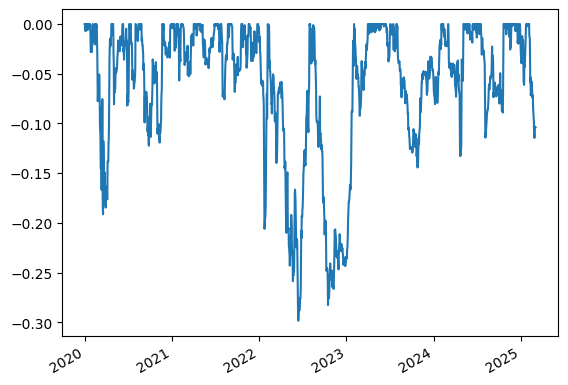

In [65]:
drawdown(momentum_daily).plot()

<Axes: >

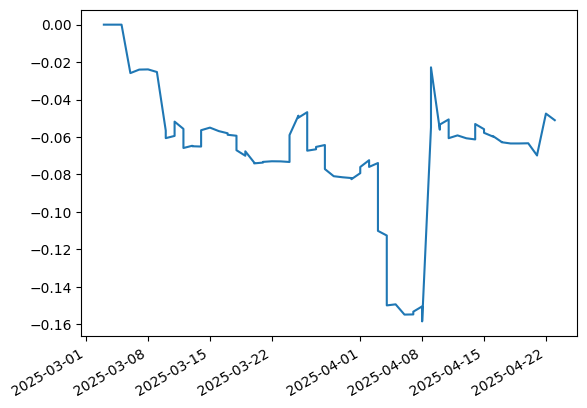

In [66]:
drawdown(momentum_dailyTest).plot()

In [67]:
#momentum_daily.index=pd.to_datetime(momentum_daily.index.date)

In [68]:
#strat_reversal.index=pd.to_datetime(strat_reversal.index.date)

In [69]:
#common_index=strat_reversal.index.intersection(momentum_daily.index)

In [70]:
#momentum_daily=momentum_daily.loc[common_index]

In [71]:
#momentum_cov={}
#for i in strat_reversal.columns:
 #  momentum_cov[i]=momentum_daily.cov(strat_reversal[i])

    

In [72]:
#reversal_cov=strat_reversal.cov()

In [73]:
#reversal_cov

In [74]:
#momentum_cov

In [75]:
def createMatrixMuForOptimumAllHourly(portFolioRetAfterMomentum,strat_reversal):
    matrix=[]
    portFolioRetAfterMomentum.index=pd.to_datetime(portFolioRetAfterMomentum.index.date)
    strat_reversal.index=pd.to_datetime(strat_reversal.index.date)
    common_index=strat_reversal.index.intersection(portFolioRetAfterMomentum.index)
    portFolioRetAfterMomentum=portFolioRetAfterMomentum.loc[common_index]
    reversal_wt_data=findRollingParams(strat_reversal)
    momentum_wt_data=findRollingParams(portFolioRetAfterMomentum)
    reversal_wt_data_vol=reversal_wt_data["volatility"]

    reversal_wt_data_ret=reversal_wt_data["ret"]
    momentum_wt_data_ret=momentum_wt_data["ret"]
    momentum_wt_data_vol=momentum_wt_data["volatility"]
    momentum_wt_data_vol.name="momentum"
    momentum_wt_data_ret.name="momentum"

    

    mu=reversal_wt_data_ret
    mu=mu.merge(momentum_wt_data_ret , left_index=True, right_index=True )
    #mu=mu.fillna(0).values.reshape(-1,1)
    matrix=reversal_wt_data_vol.merge(momentum_wt_data_vol  ,left_index=True, right_index=True )
    #matrix=matrix.fillna(0).values.reshape(-1,1)

    return matrix,mu

In [76]:
matrix,mu =createMatrixMuForOptimumAllHourly(momentum_daily,strat_reversal)
matrixTest,muTest =createMatrixMuForOptimumAllHourly(momentum_dailyTest,strat_reversalTest)

In [77]:
len(strat_reversalTest)

245

In [78]:
momentum_wt_data["ret"]

2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04   -0.003104
2020-01-05   -0.004171
                ...   
2025-02-25   -0.014170
2025-02-26   -0.004451
2025-02-27    0.001615
2025-02-28    0.011502
2025-03-03   -0.001039
Length: 1883, dtype: float64

In [79]:
reversalFilter=[1,2,3,4,5,6,7]

In [80]:
final_wtRev=getOptimalWts(matrix[reversalFilter],mu[reversalFilter]).fillna(0)
final_wtRevTest=getOptimalWts(matrixTest[reversalFilter],muTest[reversalFilter]).fillna(0)


In [81]:
matrix

,1,2,3,4,5,6,7,momentum
2023-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-16,0.000822,0.000822,0.000822,0.000822,0.000822,0.000822,0.000822,NaN
2023-03-16,0.000629,0.000552,0.000544,0.000544,0.000544,0.000544,0.000544,NaN
2023-03-16,0.000503,0.000398,0.000380,0.000380,0.000380,0.000380,0.000380,NaN
2023-03-16,0.000384,0.000306,0.000311,0.000301,0.000299,0.000299,0.000299,NaN
...,...,...,...,...,...,...,...,...
2025-03-03,0.002713,0.001409,0.001232,0.001594,0.000703,0.001518,0.000549,0.002266
2025-03-03,0.002709,0.001435,0.001242,0.001605,0.000701,0.001504,0.000542,0.002266
2025-03-03,0.002801,0.001472,0.001362,0.001725,0.000822,0.001662,0.000667,0.002266
2025-03-03,0.002876,0.001560,0.001429,0.001772,0.000855,0.001702,0.000690,0.002266


In [82]:
mu

,1,2,3,4,5,6,7,momentum
2023-03-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015853
2023-03-16,0.007405,0.007405,0.007405,0.007405,0.007405,0.007405,0.007405,0.015853
2023-03-16,-0.000968,-0.000045,0.000057,0.000057,0.000057,0.000057,0.000057,0.015853
2023-03-16,-0.001185,0.000456,0.000984,0.000984,0.000984,0.000984,0.000984,0.015853
2023-03-16,0.000203,0.000800,0.000033,0.000444,0.000597,0.000597,0.000597,0.015853
...,...,...,...,...,...,...,...,...
2025-03-03,-0.001265,-0.000876,-0.000268,-0.000472,0.000013,-0.000225,0.000220,-0.001039
2025-03-03,-0.001946,0.002987,0.001213,0.001171,-0.000495,-0.000423,-0.000011,-0.001039
2025-03-03,-0.012184,-0.008413,-0.013163,-0.013484,-0.012613,-0.012056,-0.012433,-0.001039
2025-03-03,0.005831,0.007117,0.005748,0.004520,-0.007717,-0.006117,-0.006538,-0.001039


In [83]:
final_wt=final_wtRev
final_wtTest=final_wtRevTest

In [84]:
strat_final=mu[[1,2,3,4,5,6,7]].multiply(final_wt)
strat_finalTest=muTest[[1,2,3,4,5,6,7]].multiply(final_wtTest)

In [85]:
range(1,8)

range(1, 8)

In [86]:
strat_final[[1,2,3,4,5,6,7]]

,1,2,3,4,5,6,7
2023-03-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-16,-0.000138,-0.000006,0.000008,0.000008,0.000008,0.000008,0.000008
2023-03-16,0.000850,-0.000017,0.000048,0.000048,0.000048,0.000048,0.000048
2023-03-16,-0.000029,0.000056,0.000005,0.000070,0.000094,0.000094,0.000094
...,...,...,...,...,...,...,...
2025-03-03,-0.000083,-0.000100,-0.000024,-0.000045,0.000003,-0.000021,0.000072
2025-03-03,0.000418,-0.000856,-0.000122,-0.000160,-0.000004,0.000029,-0.000002
2025-03-03,0.001587,-0.003176,-0.002333,-0.001784,0.001614,0.000615,0.000046
2025-03-03,-0.000369,-0.000592,-0.000808,-0.000514,0.001721,0.000645,0.001771


In [87]:
np.sum(np.abs(final_wt))

c:\Users\rohan\vsProjects\QuantBitcoinProject\.conda\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


1    633.677047
2    524.378258
3    487.825574
4    453.144575
5    436.896044
6    451.371311
7    435.707192
dtype: float64

In [88]:
strat_sum=strat_final.sum(1)
strat_sumTest=strat_finalTest.sum(1)
strat_finalTest


,1,2,3,4,5,6,7
2025-03-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-03-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-03-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-03-03,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709,0.000709
2025-03-03,-0.000181,-0.000064,-0.000034,-0.000034,-0.000034,-0.000034,-0.000034
...,...,...,...,...,...,...,...
2025-04-21,0.000005,0.000007,0.000001,0.001543,0.000060,0.000079,0.000123
2025-04-21,-0.000023,-0.000002,-0.000003,0.000186,0.000151,0.000029,0.000037
2025-04-21,0.000238,0.000001,0.000013,0.000046,0.000763,0.000022,0.000023
2025-04-21,0.000097,0.000005,-0.000008,-0.000102,0.000183,0.000193,0.000107


In [89]:
def hourlyToDailyReturns(df):
    df_grouped = df.groupby(df.index).sum()  # Aggregates by index
    return df_grouped
    

In [90]:
dailyReturns=hourlyToDailyReturns(strat_sum)

In [91]:
dailyReturnsTest=hourlyToDailyReturns(strat_sumTest)

In [92]:
dailyReturns.mean()/dailyReturns.std()*np.sqrt(252)

np.float64(9.49717608320658)

<Axes: >

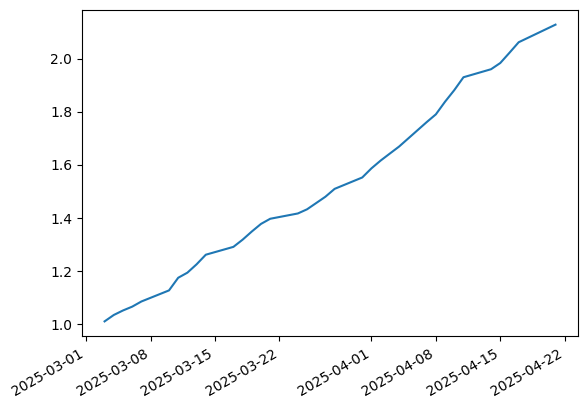

In [93]:
(1+dailyReturnsTest).cumprod().plot()

In [94]:
dailyReturnsTest.mean()/dailyReturnsTest.std()*np.sqrt(252)

np.float64(37.444112664360574)

In [95]:
dailyReturnsTest.mean()/dailyReturnsTest.std()*np.sqrt(252)

np.float64(37.444112664360574)

In [96]:
strat_sum

2023-03-16    0.000000
2023-03-16    0.000000
2023-03-16   -0.000104
2023-03-16    0.001073
2023-03-16    0.000384
                ...   
2025-03-03   -0.000198
2025-03-03   -0.000696
2025-03-03   -0.003430
2025-03-03    0.001856
2025-03-03   -0.001898
Length: 3425, dtype: float64

--Max DrawDown---

In [97]:
#hourlyReturns=strat_sum.to_frame(name="Returns")
#hurlyReturnsTest=strat_sumTest.to_frame(name="Returns")
dd=drawdown(dailyReturns)
ddTest=drawdown(dailyReturnsTest)

In [98]:
dd.min()

np.float64(-0.03622288673920793)

<Axes: >

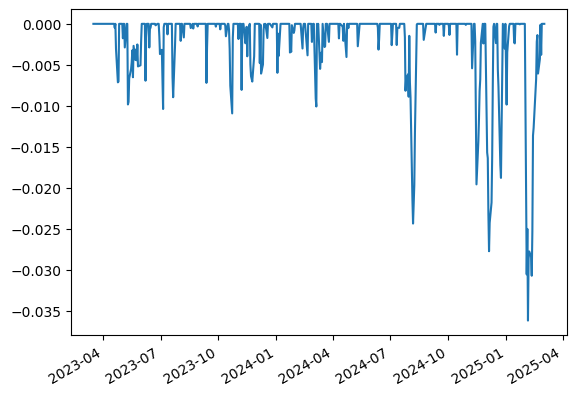

In [99]:
dd.plot()

In [100]:
period=[2,'momentum']

In [101]:
final_wtOneHour=getOptimalWts(matrix[period],mu[period]).fillna(0)
final_wtTestOneHour=getOptimalWts(matrixTest[period],muTest[period]).fillna(0)

In [102]:
oneRevStrategy=np.multiply(mu[period],final_wtOneHour)


In [103]:
dailyReturnOneRev=oneRevStrategy.sum(1)


In [104]:
sharp(dailyReturnOneRev)

np.float64(8.418153629011835)

<Axes: >

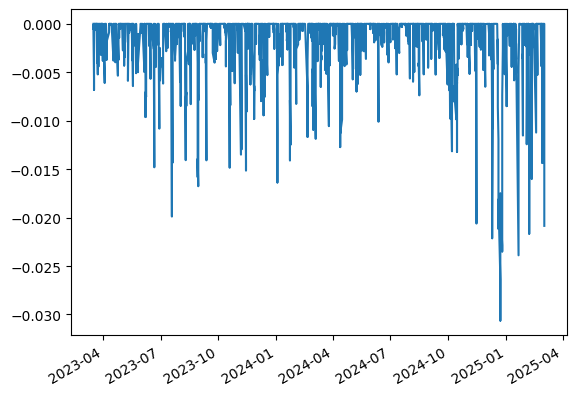

In [105]:
drawdown(dailyReturnOneRev).plot()

<Axes: >

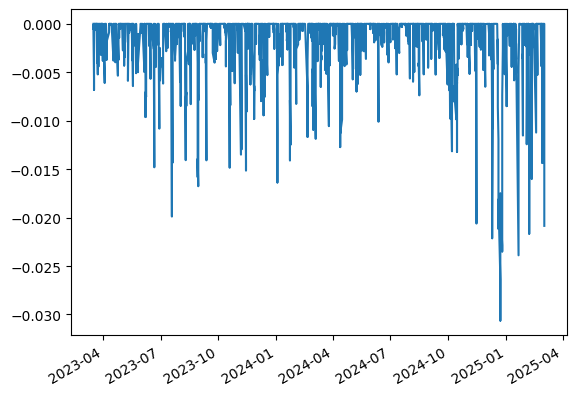

In [106]:
drawdown(dailyReturnOneRev).plot()

<Axes: >

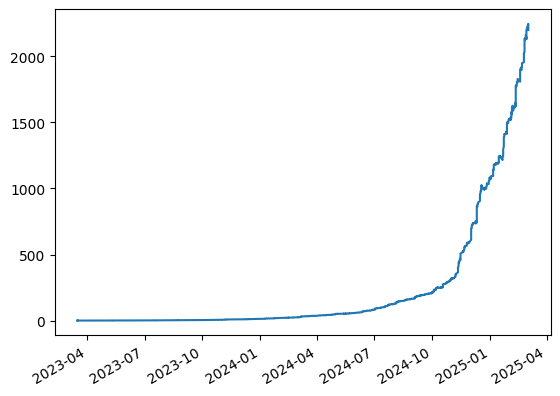

In [107]:
(1+dailyReturnOneRev).cumprod().plot()

<Axes: >

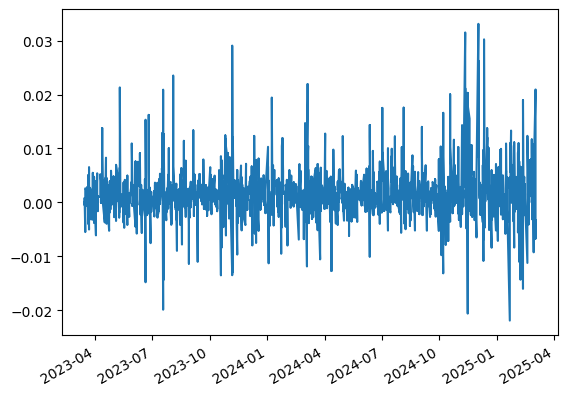

In [108]:
dailyReturnOneRev.plot()

In [109]:
drawDownDurationDays(dailyReturnOneRev).idxmax()

DrawdownDuration   2024-12-26
dtype: datetime64[ns]

In [110]:
#BackTesting

In [111]:
ddTest.min()

np.float64(0.0)

<Axes: >

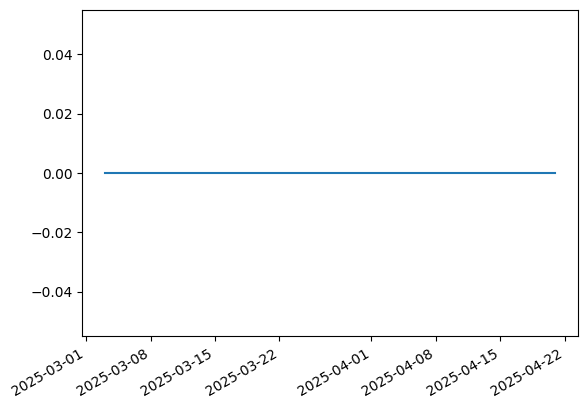

In [112]:
ddTest.plot()

In [113]:
drawDownDurationDays(dailyReturns)

,DrawdownDuration
2023-03-16,0
2023-03-17,0
2023-03-20,0
2023-03-21,0
2023-03-22,0
...,...
2025-02-25,8
2025-02-26,9
2025-02-27,0
2025-02-28,0


In [114]:
drawDownDurationDays(dailyReturnsTest)

,DrawdownDuration
2025-03-03,0
2025-03-04,0
2025-03-05,0
2025-03-06,0
2025-03-07,0
2025-03-10,0
2025-03-11,0
2025-03-12,0
2025-03-13,0
2025-03-14,0


In [115]:
(drawDownDurationDays(dailyReturnsTest)).max()

DrawdownDuration    0
dtype: int64

In [116]:
oneRevStrategyTest=np.multiply(muTest[[7,'momentum']],final_wtTestOneHour)
dailyReturnOneRevTest=oneRevStrategyTest.sum(1)
print(sharp(dailyReturnOneRevTest))
ddTest=drawdown(dailyReturnOneRevTest)



2.093050947507939


<Axes: >

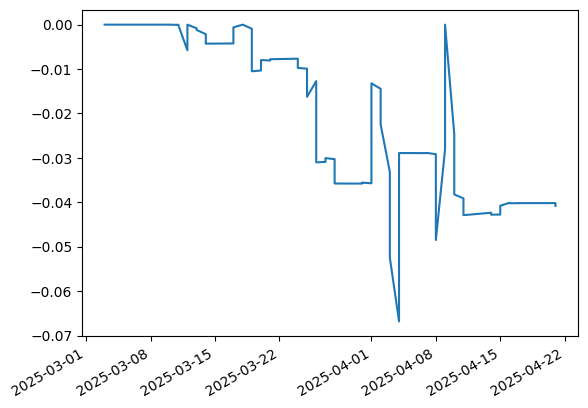

In [117]:
ddTest.plot()

In [118]:
(drawDownDurationDays(dailyReturnOneRevTest)).max()

DrawdownDuration    106
dtype: int64